In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [29]:
def load_halo_summary(filename):
    dtype=[('Nsat','i8'),
           ('vmax', 'f8'),
           ('mstar', 'f8'), 
           ('d', 'f8'),
           ('a', 'f8'),
           ('b', 'f8'),
           ('c', 'f8'),
           ('Ia_x', 'f8'),
           ('Ia_y', 'f8'),
           ('Ia_z', 'f8')]
    file_data = np.loadtxt(filename, dtype=dtype)    
    return file_data

In [43]:
data_path = "../data/mstar_selected_summary"
file_halo_A = os.path.join(data_path, "halo_A.dat")
file_halo_B = os.path.join(data_path, "halo_B.dat")
hubble = 0.73


In [44]:
data_halo_A = load_halo_summary(file_halo_A)
data_halo_B = load_halo_summary(file_halo_B)

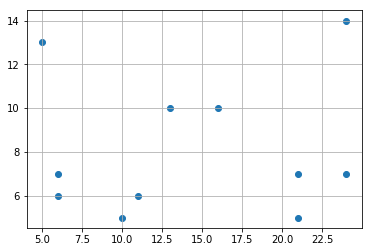

In [45]:
plt.scatter(data_halo_A['Nsat'], data_halo_B['Nsat'])
plt.grid()

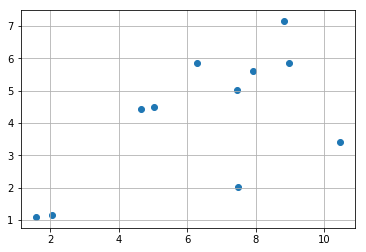

In [46]:
plt.scatter(data_halo_A['mstar']/hubble, data_halo_B['mstar']/hubble)
plt.grid()